In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [27]:
for_sale_path = "For_Sale_Inventory.csv"
median_list_path = "Median_List_Price.csv"
median_sale_path = "Median_Sale_Price.csv"

for_sale_inventory_df = pd.read_csv(for_sale_path)
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

In [28]:
median_sale_path_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31
0,102001,0,United States,country,NaN,234380.0,234442.0,234849.0,235951.0,236007.0,...,345711.0,341612.0,340293.0,336665.0,331699.0,329075.0,332027.0,336887.0,341925.0,346360.0
1,394913,1,"New York, NY",msa,NY,401764.0,405294.0,404447.0,407066.0,402104.0,...,555641.0,550597.0,541934.0,533548.0,527744.0,526432.0,522828.0,523893.0,529253.0,543442.0
2,753899,2,"Los Angeles, CA",msa,CA,631151.0,627899.0,629272.0,629520.0,628103.0,...,871228.0,859552.0,854193.0,848123.0,839324.0,835470.0,834050.0,838316.0,838854.0,844579.0
3,394463,3,"Chicago, IL",msa,IL,222210.0,222485.0,224193.0,229204.0,229744.0,...,293035.0,289086.0,286341.0,285431.0,283993.0,284873.0,286836.0,290321.0,292884.0,297489.0
4,394514,4,"Dallas, TX",msa,TX,259839.0,254791.0,253216.0,253643.0,254724.0,...,403328.0,396555.0,392024.0,388165.0,380437.0,374170.0,372678.0,374397.0,376771.0,379086.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,395239,885,"Worthington, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164859.0,170386.0,162643.0
638,395130,890,"Sterling, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233255.0,231834.0,238605.0
639,394371,891,"Beatrice, NE",msa,NE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154438.0,146112.0,152898.0
640,394403,899,"Borger, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138170.0,142853.0


In [29]:
region_df = median_sale_path_df.rename(columns={"2018-08-31":"August 2018",
                                                              "2019-08-31":"August 2019",
                                                              "2020-08-31":"August 2020",
                                                              "2021-08-31":"August 2021",
                                                              "2022-08-31":"August 2022",
                                                              "2023-05-31":"May 2023"})
housing_sale_prices = region_df[["RegionID","RegionName","RegionType","StateName",
                                           "August 2018","August 2019","August 2020","August 2021",
                                           "August 2022","May 2023"]].copy()
housing_sale_prices.head()  

,RegionID,RegionName,RegionType,StateName,August 2018,August 2019,August 2020,August 2021,August 2022,May 2023
0,102001,United States,country,NaN,234380.0,246235.0,264691.0,314742.0,345711.0,346360.0
1,394913,"New York, NY",msa,NY,401764.0,404490.0,421916.0,505905.0,555641.0,543442.0
2,753899,"Los Angeles, CA",msa,CA,631151.0,636499.0,685362.0,809457.0,871228.0,844579.0
3,394463,"Chicago, IL",msa,IL,222210.0,227639.0,244615.0,272749.0,293035.0,297489.0
4,394514,"Dallas, TX",msa,TX,259839.0,265462.0,284716.0,346007.0,403328.0,379086.0


In [30]:
#Create a variable for each city we are analyzing for this project
homes_in_austin_tx = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Austin, TX"]
homes_in_omaha_ne = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Omaha, NE"]
homes_in_chicago_il = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Chicago, IL"]
homes_in_ny_ny = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "New York, NY"]
homes_in_la_ca = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Los Angeles, CA"]

In [31]:
#Make a DataFrame using the loc function to find specific cities
sale_price_comparison = housing_sale_prices.loc[(housing_sale_prices["RegionName"] == "Austin, TX") |
                                                 (housing_sale_prices["RegionName"] == "Omaha, NE") |
                                                (housing_sale_prices["RegionName"] == "Chicago, IL") |
                                                (housing_sale_prices["RegionName"] == "New York, NY") |
                                                (housing_sale_prices["RegionName"] == "Los Angeles, CA") 
                                               ]

,RegionID,RegionName,RegionType,StateName,August 2018,August 2019,August 2020,August 2021,August 2022,May 2023
0,102001,United States,country,NaN,234380.0,246235.0,264691.0,314742.0,345711.0,346360.0
1,394913,"New York, NY",msa,NY,401764.0,404490.0,421916.0,505905.0,555641.0,543442.0
2,753899,"Los Angeles, CA",msa,CA,631151.0,636499.0,685362.0,809457.0,871228.0,844579.0
3,394463,"Chicago, IL",msa,IL,222210.0,227639.0,244615.0,272749.0,293035.0,297489.0
4,394514,"Dallas, TX",msa,TX,259839.0,265462.0,284716.0,346007.0,403328.0,379086.0
5,394692,"Houston, TX",msa,TX,222930.0,231367.0,248701.0,295498.0,330813.0,317600.0
6,395209,"Washington, DC",msa,VA,386045.0,396773.0,427114.0,466583.0,498345.0,510100.0
7,394974,"Philadelphia, PA",msa,PA,227934.0,242127.0,257630.0,292588.0,318420.0,322824.0
8,394856,"Miami, FL",msa,FL,263951.0,278705.0,308707.0,351454.0,413175.0,442036.0
9,394347,"Atlanta, GA",msa,GA,222852.0,239422.0,261164.0,320665.0,371678.0,360484.0


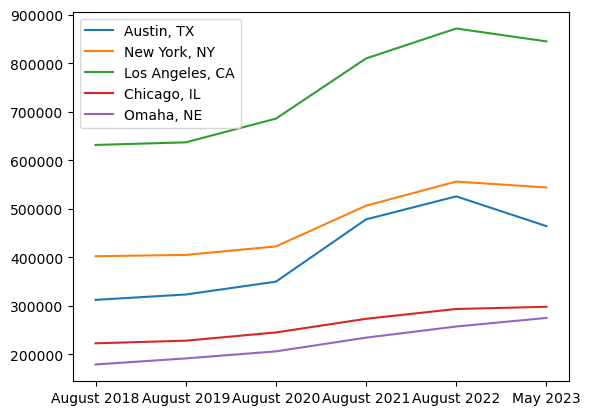

In [37]:
# Reset index to match the city and state we are analyzing 
sale_price_comparison.set_index("RegionName")

# Find the row where each city is located 
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Omaha, NE"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "New York, NY"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Chicago, IL"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Los Angeles, CA"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Austin, TX"]

# Find the Sales prices over the five-year period for each city 
ny_ny_sale_prices = housing_sale_prices.iloc[1,4:].to_list()
om_ne_sale_prices = housing_sale_prices.iloc[58,4:].to_list()
ch_il_sale_prices = housing_sale_prices.iloc[3,4:].to_list()
los_ca_sale_prices = housing_sale_prices.iloc[2,4:].to_list()
au_tx_sale_prices = housing_sale_prices.iloc[29,4:].to_list()

# Create a DataFrame that displays the sales prices over a 5-year period for the five cities in the US
df = pd.DataFrame({
   "Austin, TX": au_tx_sale_prices,
    "New York, NY": ny_ny_sale_prices,
    "Los Angeles, CA": los_ca_sale_prices,
    "Chicago, IL": ch_il_sale_prices,
    "Omaha, NE": om_ne_sale_prices
}, index = ["August 2018","August 2019","August 2020","August 2021","August 2022","May 2023"])

line = df.plot.line()
housing_sale_prices.head(59)